## I. Load Data and Objectives

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
#Load data
df=pd.read_excel("./Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [80]:
df_og=df.copy()

Objective: Predict Y price

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Column "No" is index, so remove this one keep index

In [82]:
df.drop(columns=["No"],inplace=True)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Convert Float to Timeframe

In [83]:
def convert_to_datetime(years):
    year = int(years)
    month = np.rint((years - year) * 12-1)
    base_date = pd.to_datetime(f'{year}')
    return base_date + pd.DateOffset(months=month)

df["X1 transaction date"] = df["X1 transaction date"].apply(convert_to_datetime)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-11-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-07-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-06-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-01,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2012-12-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08-01,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-03-01,18.8,390.96960,7,24.97923,121.53986,40.6
412,2012-12-01,8.1,104.81010,5,24.96674,121.54067,52.5


In [84]:
df["X1 transaction date"].value_counts()

X1 transaction date
2013-05-01    58
2013-06-01    47
2013-01-01    46
2012-11-01    38
2013-03-01    32
2012-10-01    31
2012-08-01    30
2013-04-01    29
2012-12-01    28
2012-09-01    27
2013-02-01    25
2013-07-01    23
Name: count, dtype: int64

In [85]:
df_og["X1 transaction date"].value_counts()

X1 transaction date
2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: count, dtype: int64

Missing values?

In [86]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Duplicated?

In [87]:
df.duplicated().sum()

0

Dist. plot and Boxplot of data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


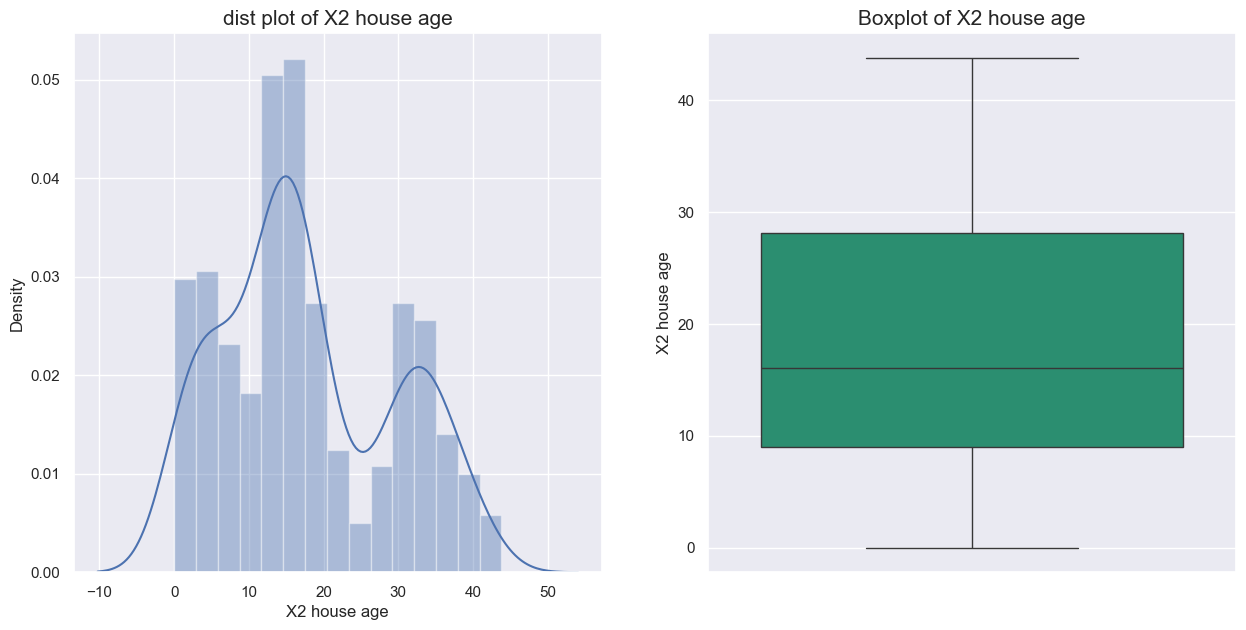

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


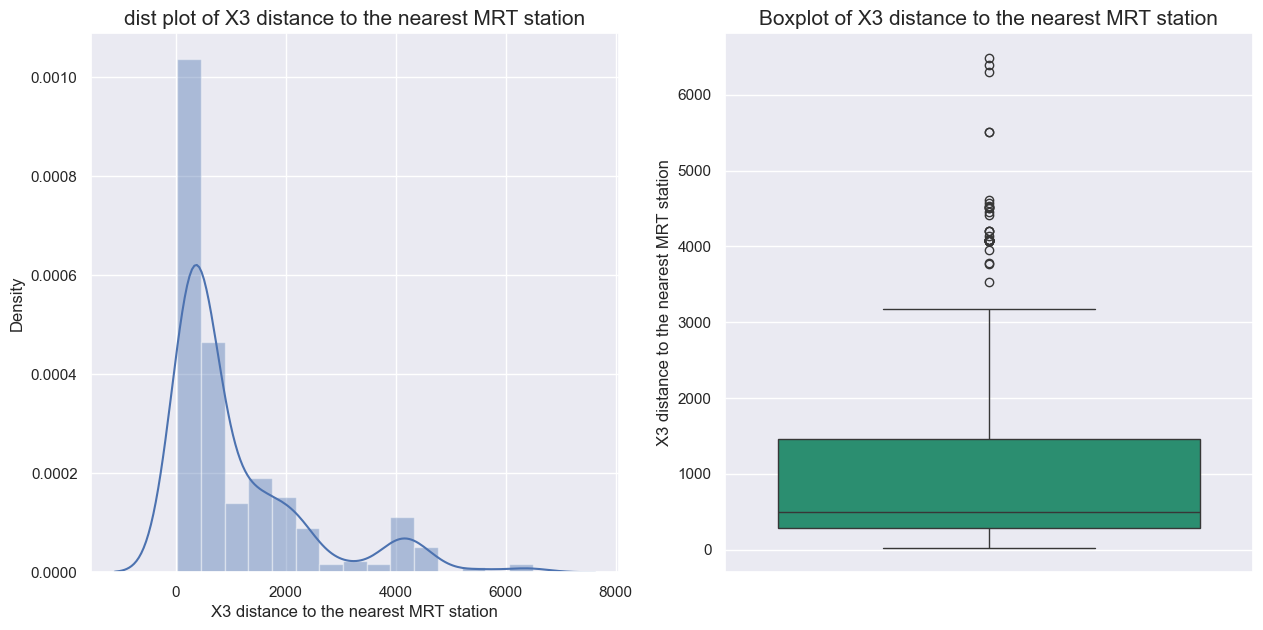

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


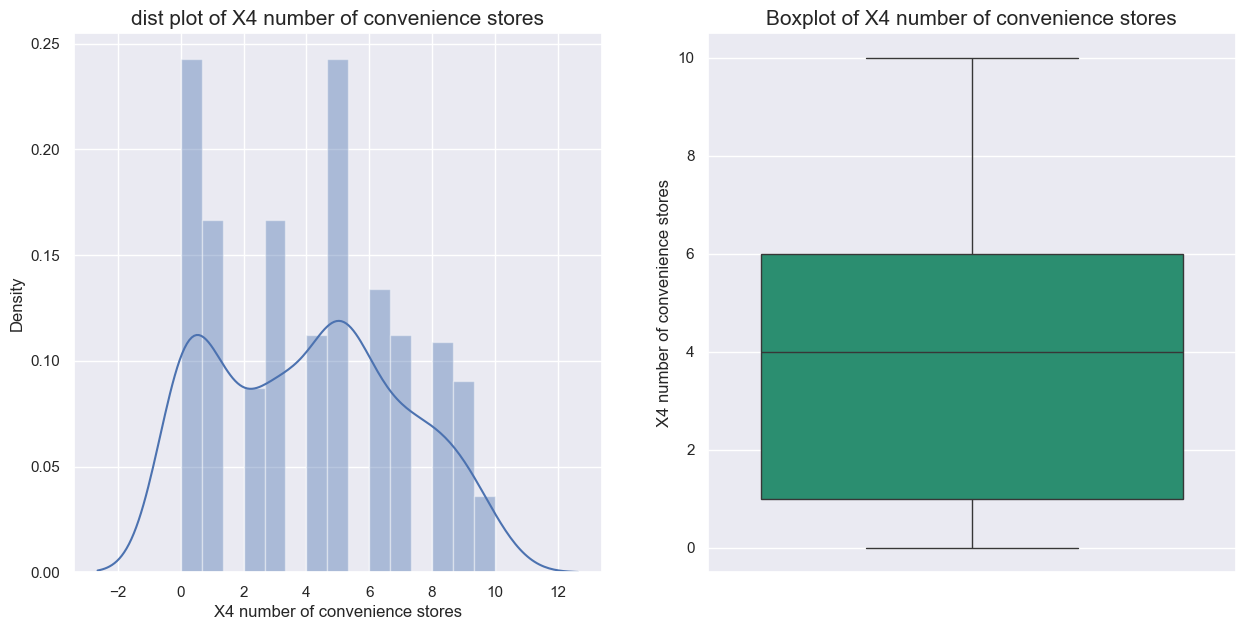

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


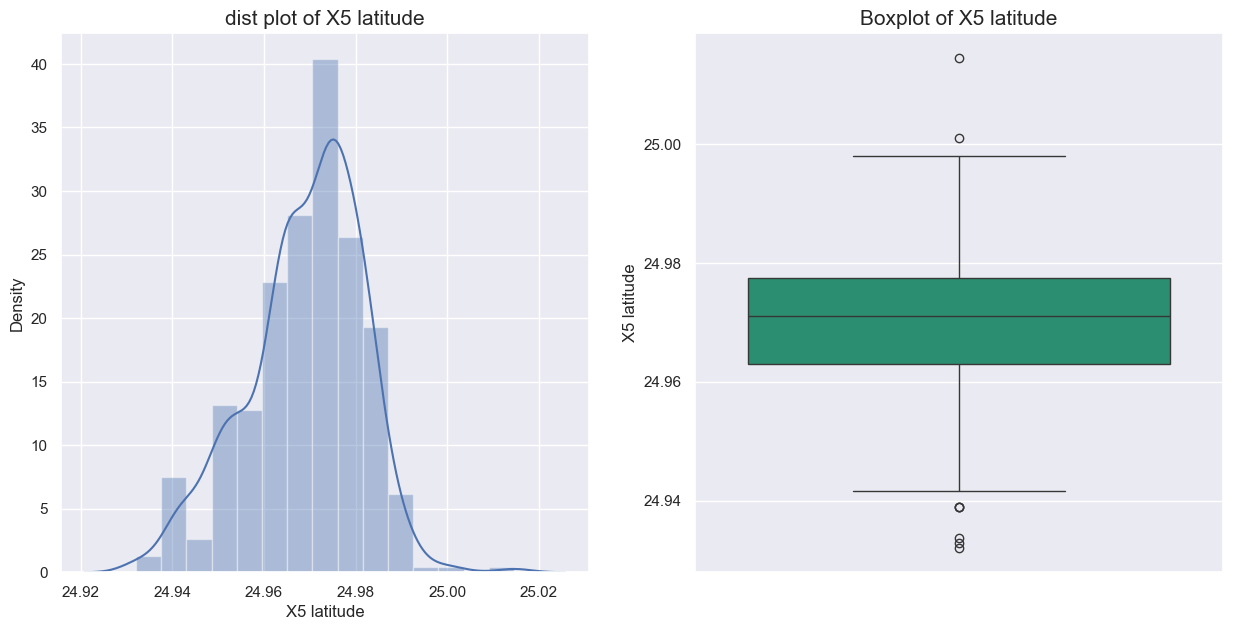

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


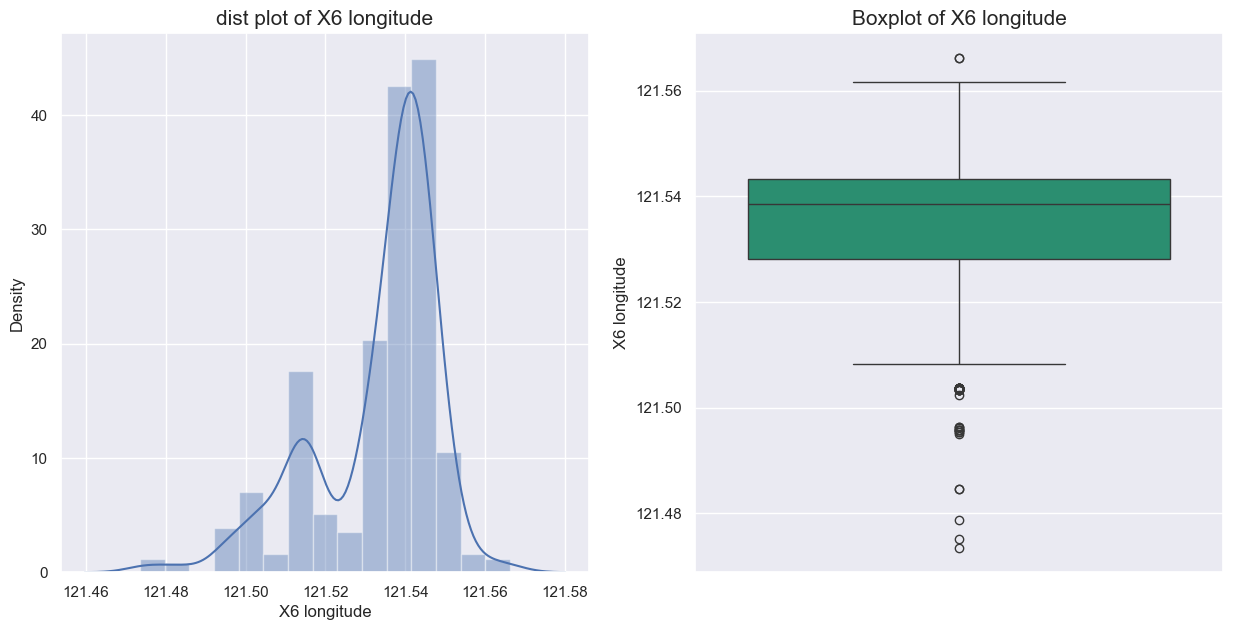

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


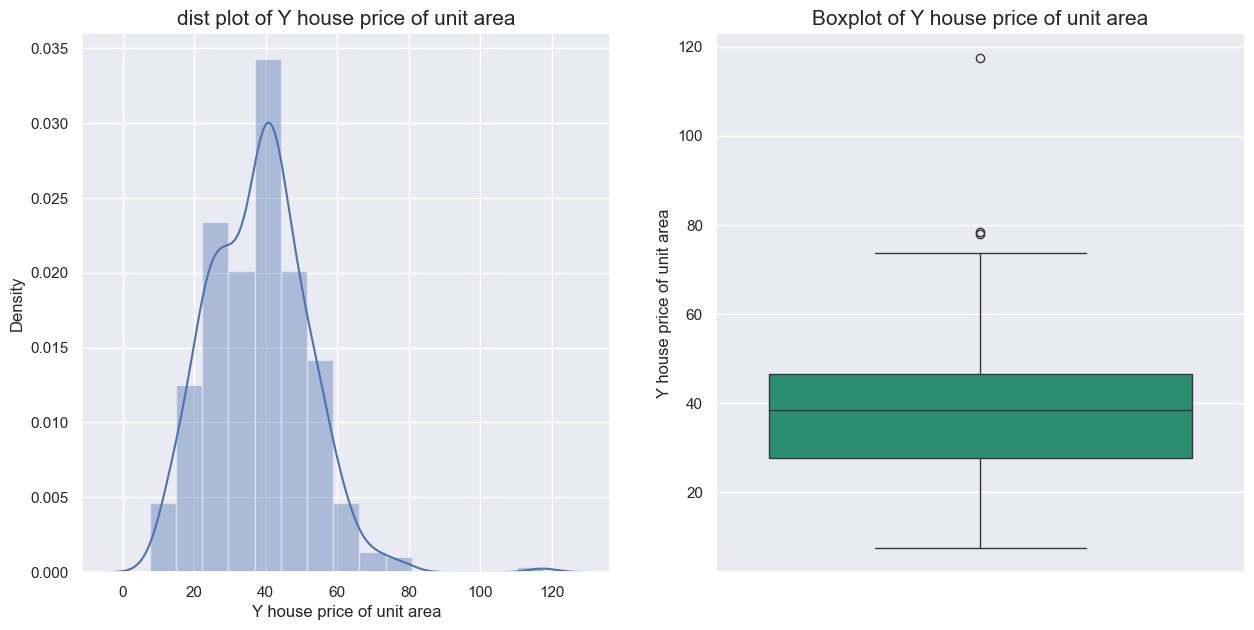

In [88]:
for column in df.select_dtypes(include='number').columns.tolist() :
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title('dist plot of '+column, fontsize=15)
    sns.distplot(df[column],bins=15)
    plt.subplot(1,2,2)
    plt.title('Boxplot of '+column, fontsize=15)
    sns.boxplot(data = df[column], palette="Dark2")
    plt.show()  

In [89]:
df_capped=df.copy()

Capped data

In [90]:
for column in df_capped.select_dtypes(include='number').columns.tolist() :
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    max_limit = Q3 + (1.5 * IQR)
    min_limit = Q1 - (1.5 * IQR) 
    df_capped[column] = pd.DataFrame(np.where(df_capped[column] > max_limit, max_limit, 
         (np.where(df_capped[column] < min_limit, min_limit, df_capped[column]))), columns=[column])

Dist. plot and Boxplot of data after capped

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


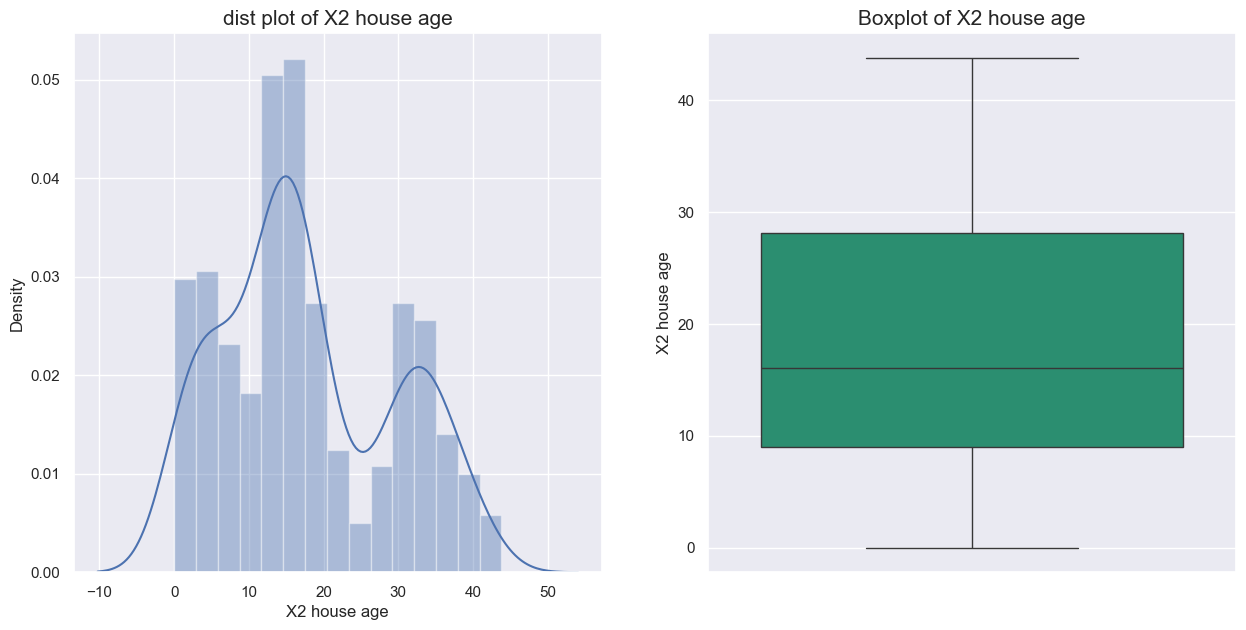

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


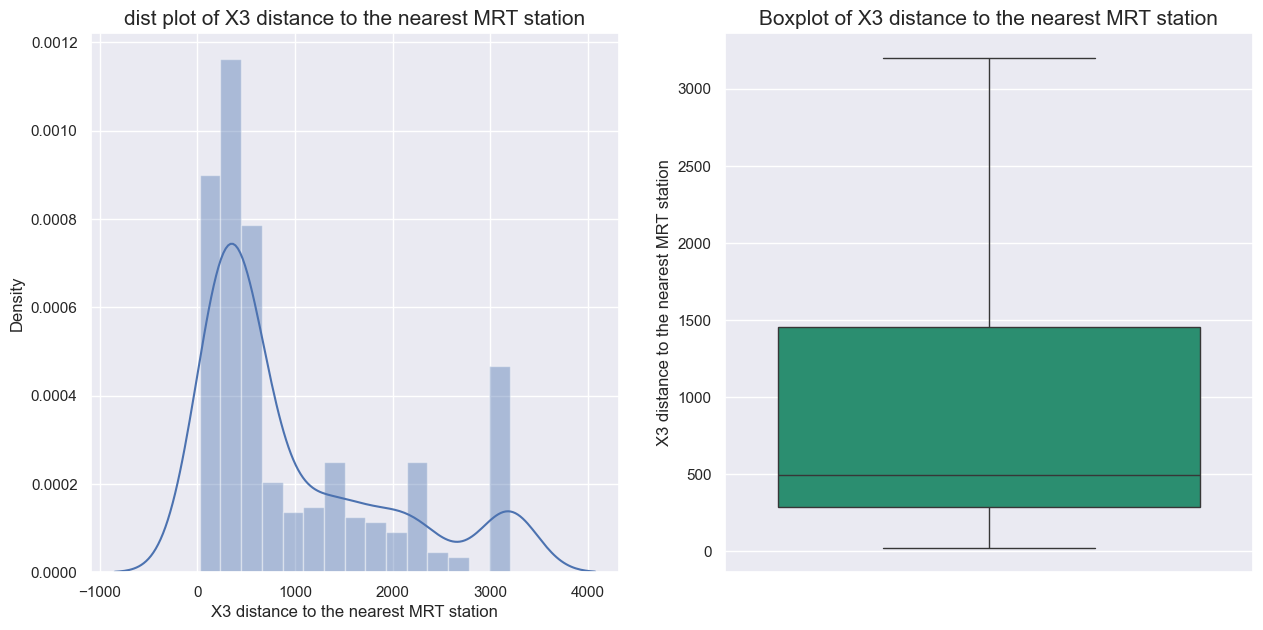

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


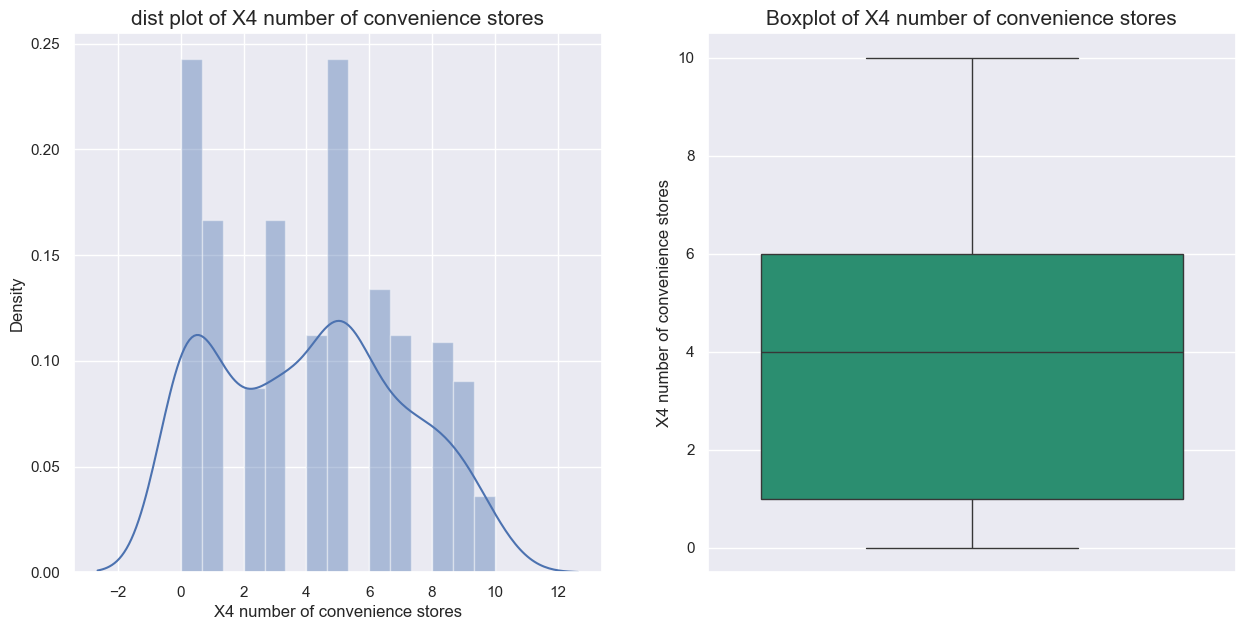

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


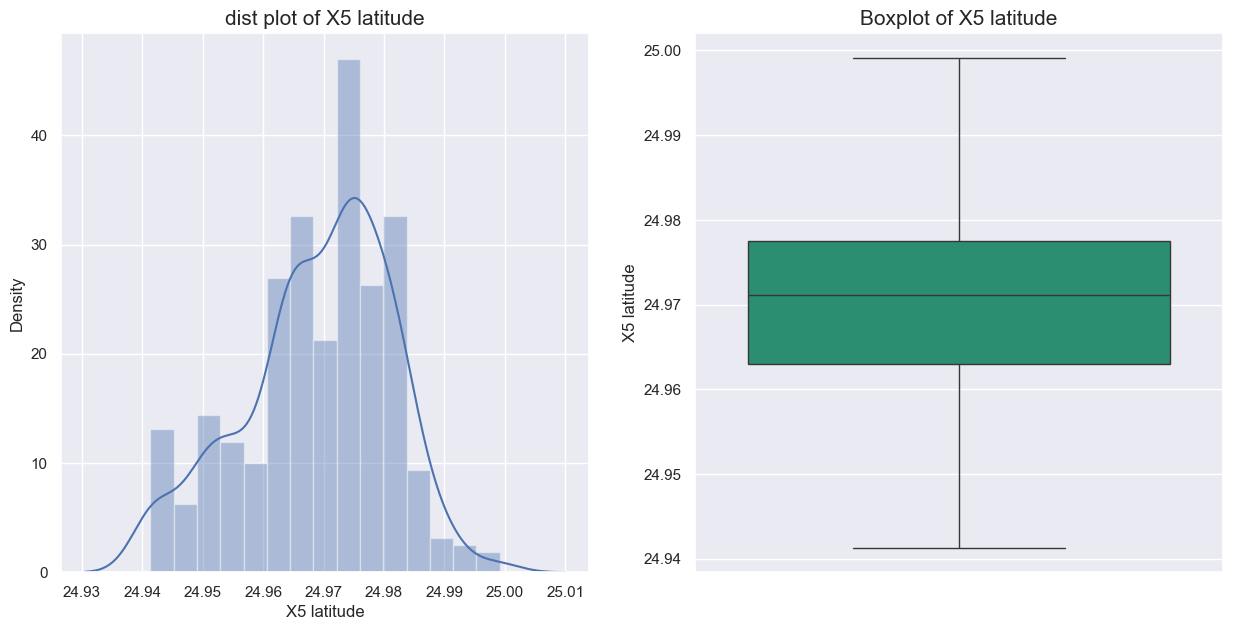

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


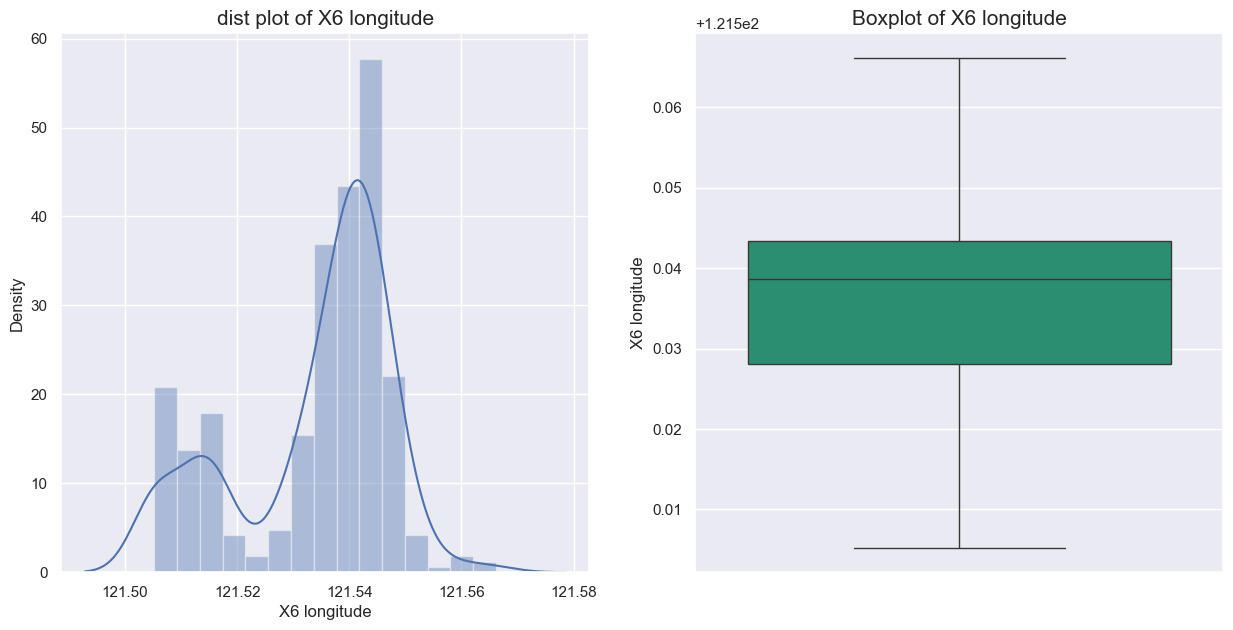

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\3437602839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


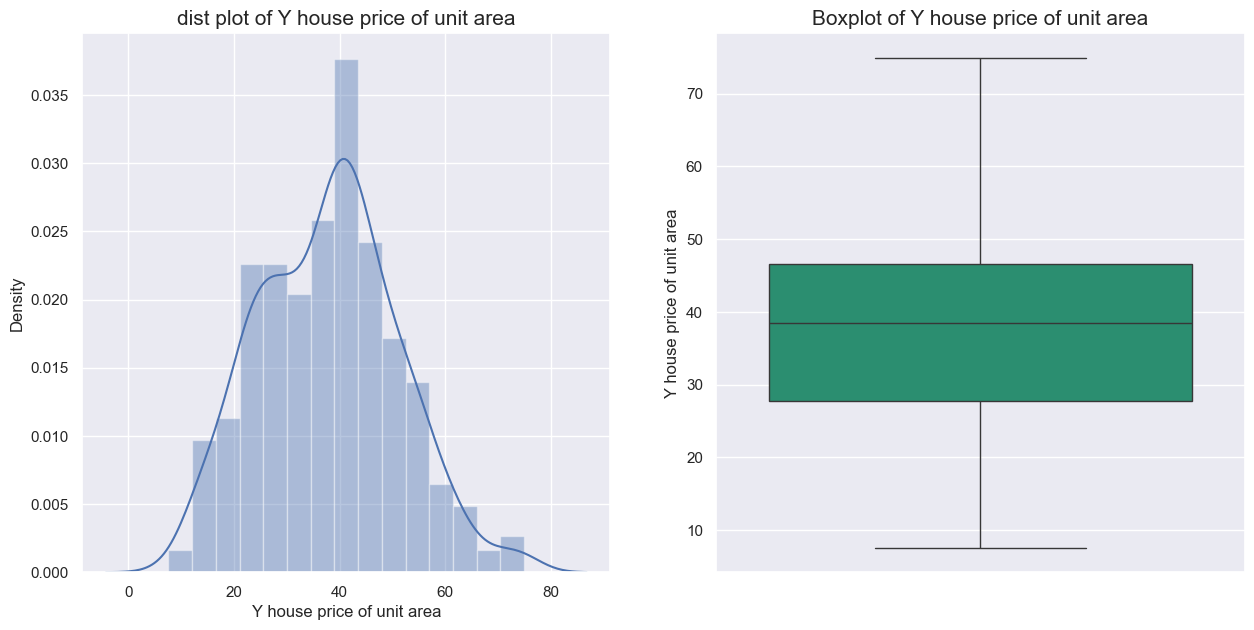

In [91]:
for column in df_capped.select_dtypes(include='number').columns.tolist() :
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title('dist plot of '+column, fontsize=15)
    sns.distplot(df_capped[column],bins=15)
    plt.subplot(1,2,2)
    plt.title('Boxplot of '+column, fontsize=15)
    sns.boxplot(data = df_capped[column], palette="Dark2")
    plt.show()  

EDA and Data visualization

In [92]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-01-24 02:50:26.086956544,2012-08-01 00:00:00,2012-11-01 00:00:00,2013-02-01 00:00:00,2013-05-01 00:00:00,2013-07-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,1083.885689,23.38284,289.3248,492.2313,1454.279,6488.021,1262.109595
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.96903,24.93207,24.963,24.9711,24.977455,25.01459,0.01241
X6 longitude,414.0,121.533361,121.47353,121.528085,121.53863,121.543305,121.56627,0.015347
Y house price of unit area,414.0,37.980193,7.6,27.7,38.45,46.6,117.5,13.606488


In [93]:
df_capped.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-01-24 02:50:26.086956544,2012-08-01 00:00:00,2012-11-01 00:00:00,2013-02-01 00:00:00,2013-05-01 00:00:00,2013-07-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,974.545851,23.38284,289.3248,492.2313,1454.279,3201.7103,968.915855
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.969067,24.941318,24.963,24.9711,24.977455,24.999137,0.01208
X6 longitude,414.0,121.533974,121.505255,121.528085,121.53863,121.543305,121.566135,0.013779
Y house price of unit area,414.0,37.861957,7.6,27.7,38.45,46.6,74.95,13.112035


Data Visualization: mainly use histogram

[Text(0, 0, '30'),
 Text(0, 0, '27'),
 Text(0, 0, '31'),
 Text(0, 0, '38'),
 Text(0, 0, '28'),
 Text(0, 0, '46'),
 Text(0, 0, '25'),
 Text(0, 0, '32'),
 Text(0, 0, '29'),
 Text(0, 0, '58'),
 Text(0, 0, '47'),
 Text(0, 0, '23')]

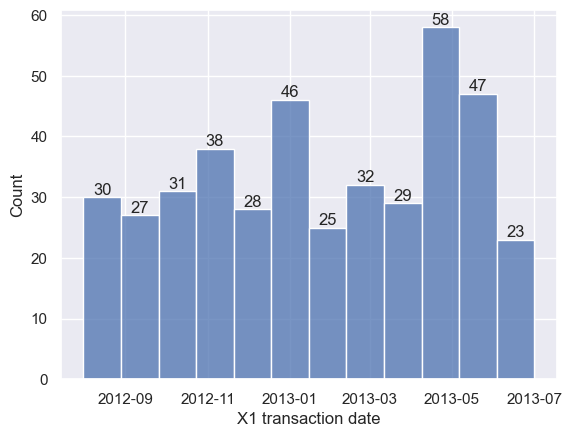

In [94]:
ax1=sns.histplot(df_capped["X1 transaction date"],bins=12,kde=False)
ax1.bar_label(ax1.containers[0], fmt=lambda x: f'{x:0.0f}' if x > 0 else '', label_type='edge')

In [95]:
df_capped["X2 house age"].max()

43.8

[Text(0, 0, '117'), Text(0, 0, '174'), Text(0, 0, '64'), Text(0, 0, '59')]

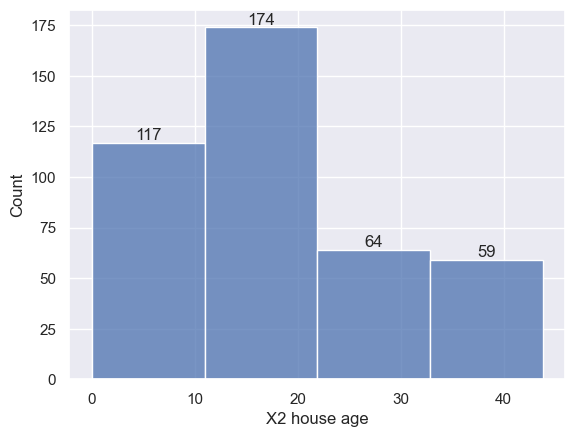

In [96]:
ax2=sns.histplot(df_capped["X2 house age"],bins=4)
ax2.bar_label(ax2.containers[0], fmt=lambda x: f'{x:0.0f}' if x > 0 else '', label_type='edge')

[Text(0, 0, '224'),
 Text(0, 0, '56'),
 Text(0, 0, '39'),
 Text(0, 0, '25'),
 Text(0, 0, '27'),
 Text(0, 0, '43')]

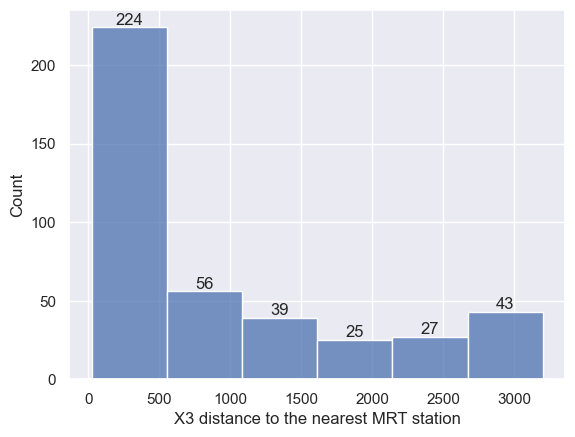

In [97]:
ax3=sns.histplot(df_capped["X3 distance to the nearest MRT station"],bins=6)
ax3.bar_label(ax3.containers[0], fmt=lambda x: f'{x:0.0f}' if x > 0 else '', label_type='edge')

[Text(0, 0, '113'),
 Text(0, 0, '70'),
 Text(0, 0, '98'),
 Text(0, 0, '68'),
 Text(0, 0, '65')]

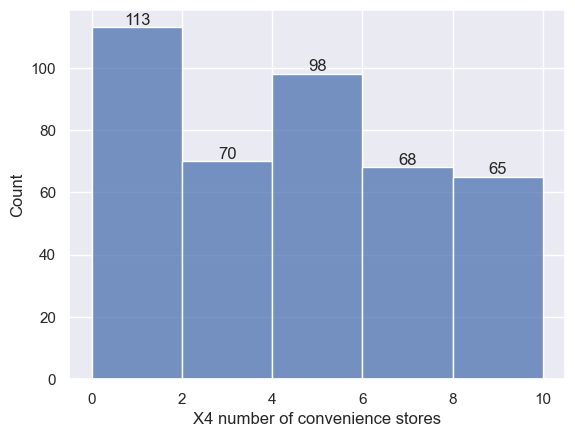

In [98]:
ax4=sns.histplot(df_capped["X4 number of convenience stores"],bins=5)
ax4.bar_label(ax4.containers[0], fmt=lambda x: f'{x:0.0f}' if x > 0 else '', label_type='edge')

[Text(0, 0, '42'),
 Text(0, 0, '122'),
 Text(0, 0, '163'),
 Text(0, 0, '70'),
 Text(0, 0, '17')]

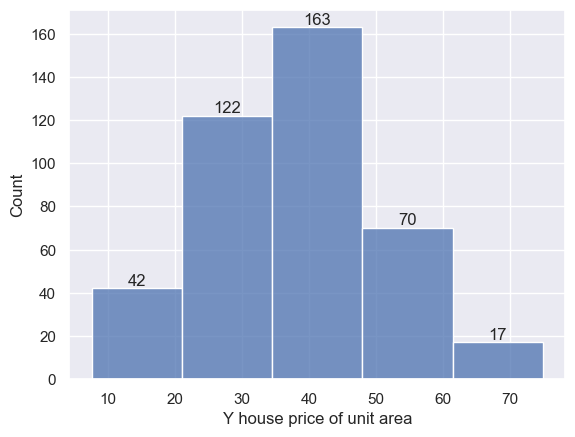

In [99]:
ay=sns.histplot(df_capped["Y house price of unit area"],bins=5)
ay.bar_label(ay.containers[0], fmt=lambda x: f'{x:0.0f}' if x > 0 else '', label_type='edge')

Text(0, 0.5, 'House Price of unit area')

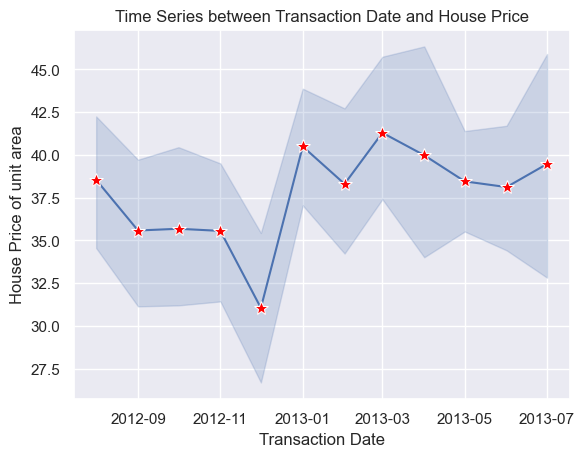

In [100]:
timeseres_x1_y=sns.lineplot(x=df_capped["X1 transaction date"],y=df_capped["Y house price of unit area"],marker="*",markerfacecolor='Red', markersize=10)
timeseres_x1_y.set_title(label="Time Series between Transaction Date and House Price")
timeseres_x1_y.set_xlabel(xlabel="Transaction Date")
timeseres_x1_y.set_ylabel(ylabel="House Price of unit area")

In [101]:
df_capped[["X1 transaction date"]]=df_capped[["X1 transaction date"]].astype("category")

In [102]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   X1 transaction date                     414 non-null    category
 1   X2 house age                            414 non-null    float64 
 2   X3 distance to the nearest MRT station  414 non-null    float64 
 3   X4 number of convenience stores         414 non-null    float64 
 4   X5 latitude                             414 non-null    float64 
 5   X6 longitude                            414 non-null    float64 
 6   Y house price of unit area              414 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 20.3 KB


<Axes: xlabel='count', ylabel='X1 transaction date'>

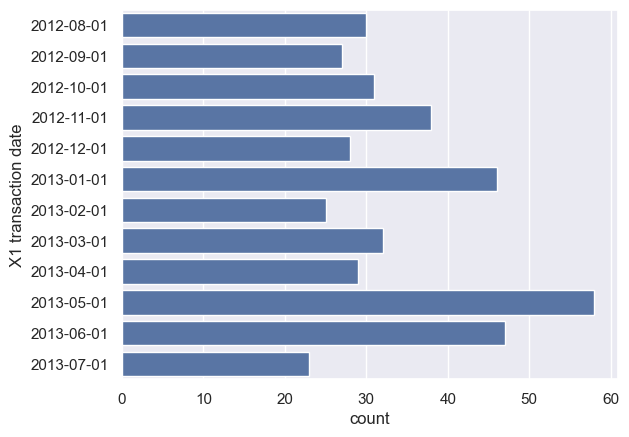

In [103]:
sns.countplot(df_capped["X1 transaction date"])

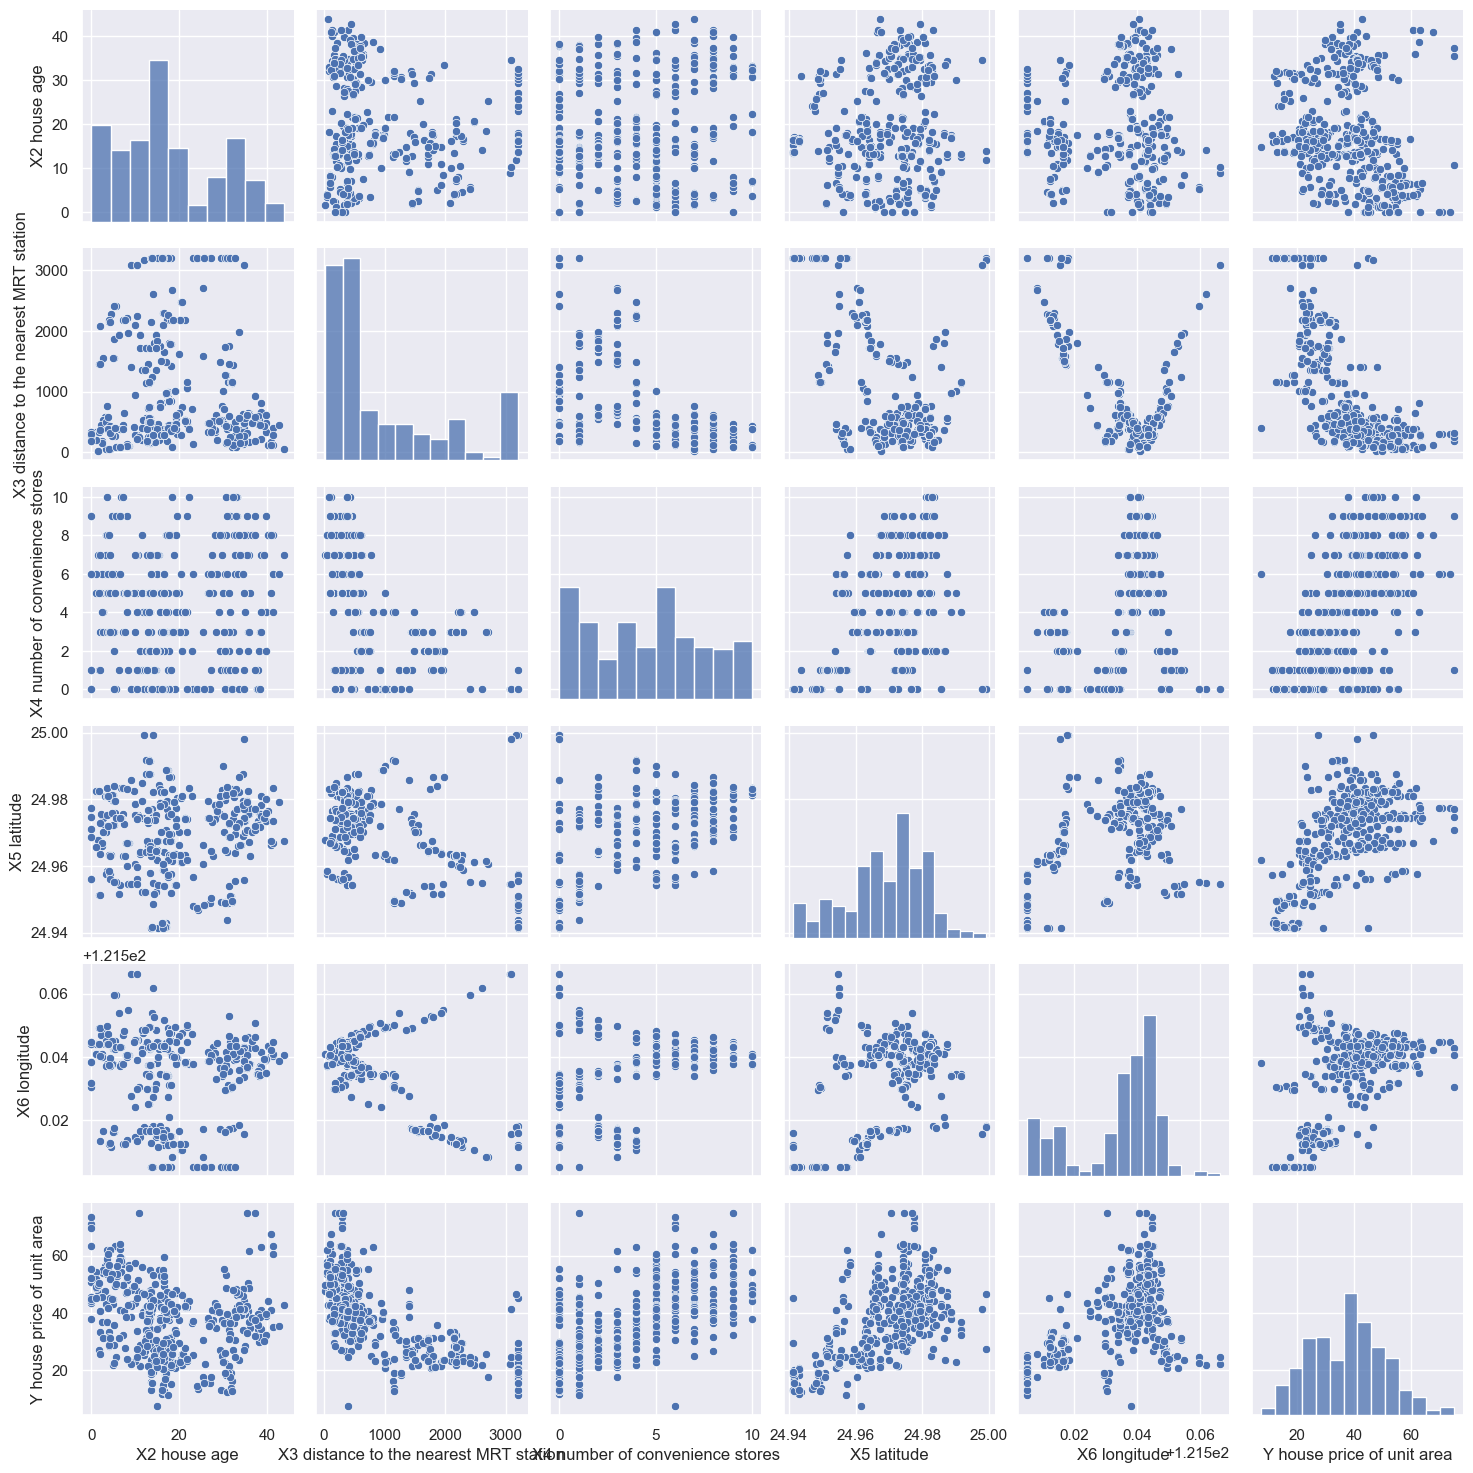

In [104]:
sns.pairplot(df_capped)

In [105]:
print(sns.heatmap.__doc__)

Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.

    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise they are inferred from the
        data and other keyword arguments.
    cmap : matplotlib colormap name or object, or list of colors, optional
        The mapping from data values to color space. If not provided, the
        default will depend on whether ``center`` is set.
    center : float, optional
        The value at which to ce

In [106]:
# annot= true value in boxes
# cmap="blues", "coolwarm"
# cbar=(0,1) 0 no cbar ,1 have cbar
# linewidth size of line between the boxes
# cmap viridis , coolwarm, Blues, Rdbu....
# xticklabels, yticklabels

<Axes: >

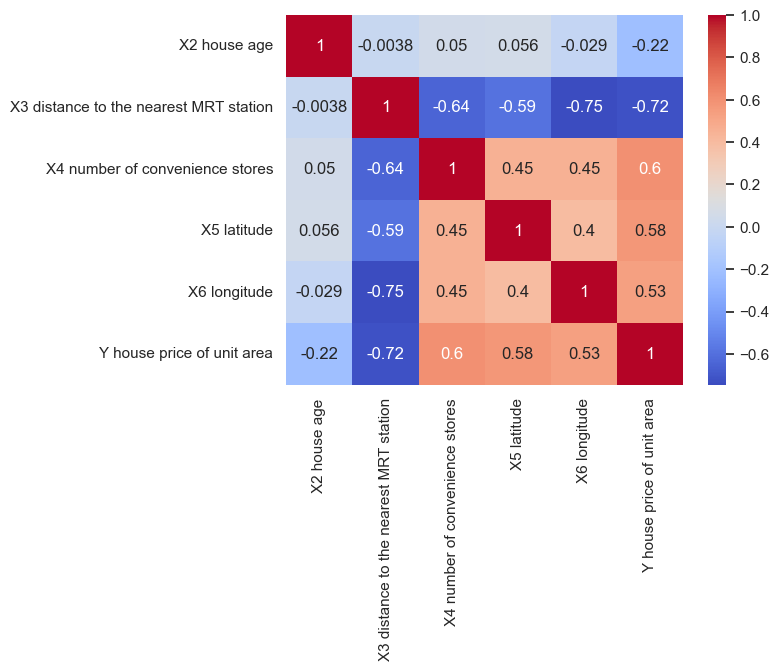

In [107]:
cr=df_capped.corr(numeric_only=True)
sns.heatmap(cr,annot=True,cmap="coolwarm")

Text(0.5, 1.0, 'heatmap of X1 and Y')

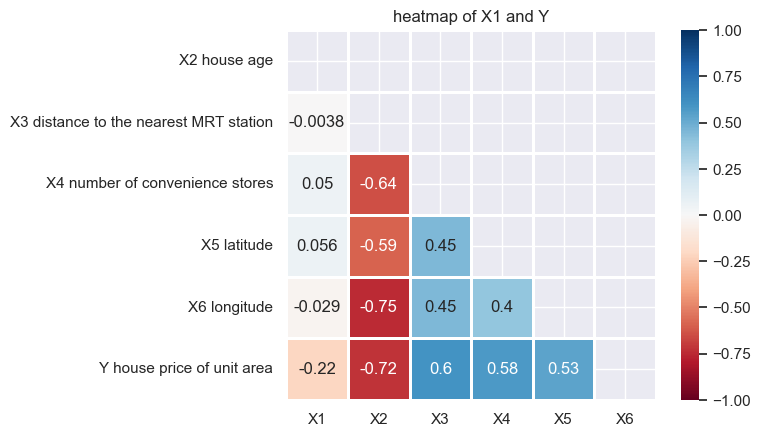

In [108]:
matrix=np.triu(cr)
sns.heatmap(
    cr,
    annot=True,
    cmap="RdBu",
    vmin=-1,
    center=0,
    vmax=1,
    cbar=1,
    linewidths=2,
    square=True,
    mask=matrix,
    xticklabels=['X1','X2','X3','X4','X5','X6'],
    yticklabels="auto"
)
plt.title("heatmap of X1 and Y")

In [109]:
col=df.columns.to_list()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\2759576642.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hm.set_xticklabels(col)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1856\2759576642.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hm.set_yticklabels(col)


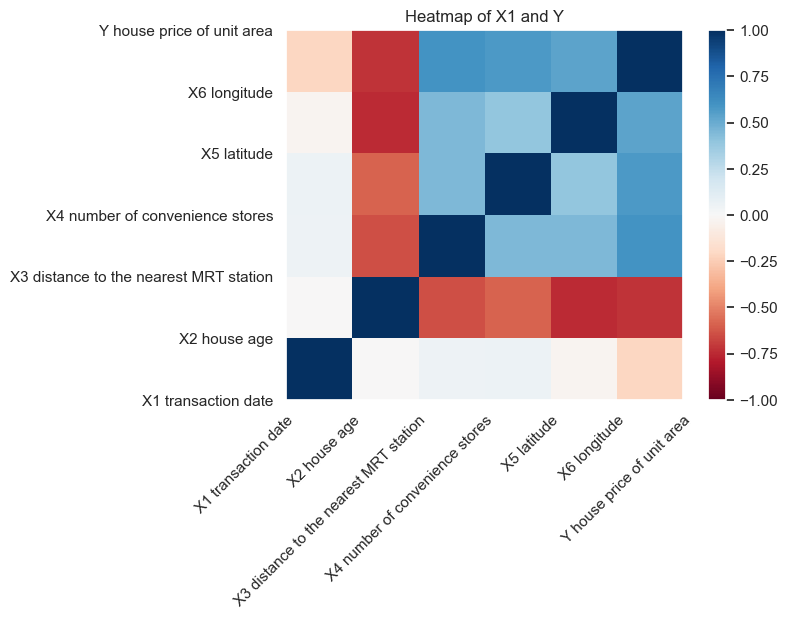

In [110]:
fig, hm=plt.subplots()
hm.set_xticklabels(col)
hm.set_yticklabels(col)
plt.pcolormesh(cr, cmap='RdBu',vmin=-1,vmax=1)
plt.title("Heatmap of X1 and Y")
plt.setp(hm.get_xticklabels(),rotation=45,ha="right",
         rotation_mode="anchor")
plt.setp(hm.get_yticklabels(),rotation=0,ha="right")
plt.colorbar()
plt.show()


In [111]:
df_capped.drop(columns=["X2 house age"],inplace=True)

In [112]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
data_x = df_capped.iloc[:,1 : -1]
data_y = df_capped.iloc[:, -1]
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2, random_state=21,shuffle=True)
LR=linear_model.LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [113]:
import statsmodels.api as sm

LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
y_train_pred=LR.predict(x_train)
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.606
Model:                                    OLS   Adj. R-squared:                  0.601
Method:                         Least Squares   F-statistic:                     125.2
Date:                        Fri, 29 Dec 2023   Prob (F-statistic):           1.36e-64
Time:                                14:24:57   Log-Likelihood:                -1155.6
No. Observations:                         331   AIC:                             2321.
Df Residuals:                             326   BIC:                             2340.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [114]:
x_test=sm.add_constant(x_test)
model1=sm.OLS(y_test,x_test).fit()
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.534
Model:                                    OLS   Adj. R-squared:                  0.510
Method:                         Least Squares   F-statistic:                     22.34
Date:                        Fri, 29 Dec 2023   Prob (F-statistic):           2.57e-12
Time:                                14:24:57   Log-Likelihood:                -309.47
No. Observations:                          83   AIC:                             628.9
Df Residuals:                              78   BIC:                             641.0
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

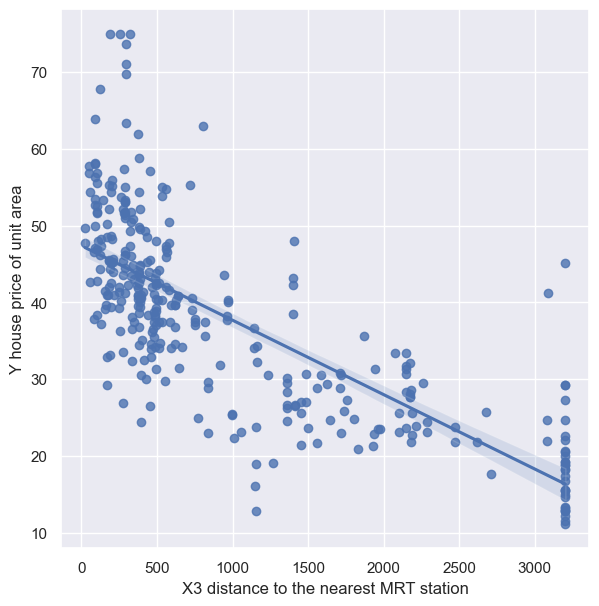

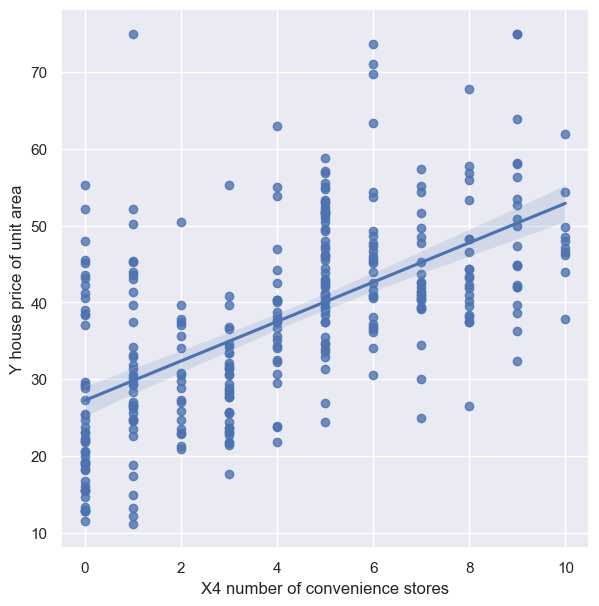

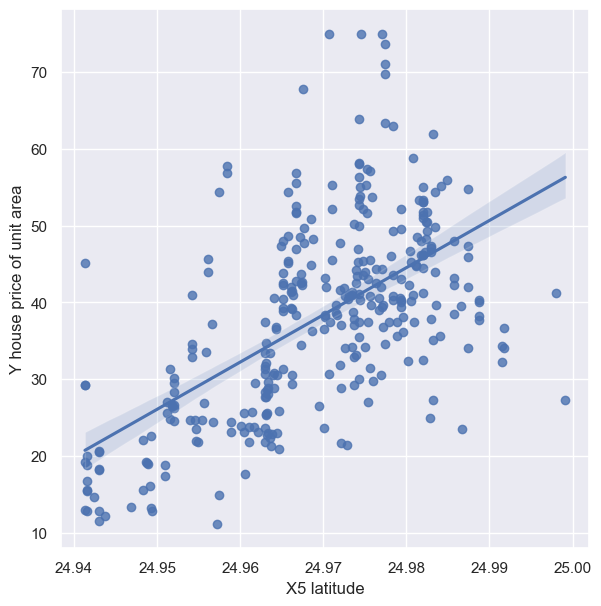

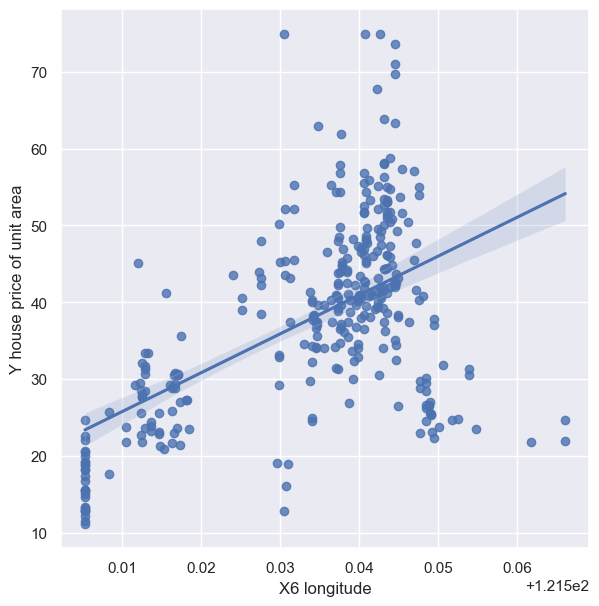

In [115]:
for column in data_x.select_dtypes(include='number').columns.tolist() :
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    sns.regplot(x=x_train[column],y=y_train)
    plt.show()  

In [116]:
LR.intercept_

-5298.2238880696905

In [117]:
LR.coef_

array([-6.59410645e-03,  7.43294806e-01,  2.10924852e+02,  5.99522211e-01])

Clustering , do other regression

without concern with outliers: Tree

Decision Tree

Random Forrest

XGbox...



SVM very sensitive to hyperparameter